<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine_learning_real_world_projects_for_practice/blob/main/Heart_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('/content/dataset (1).csv')
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [9]:
x=df.drop('target',axis=1)
y=df['target']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [12]:
confusion_matrix(y_test,y_pred)

array([[26,  3],
       [ 6, 26]])

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



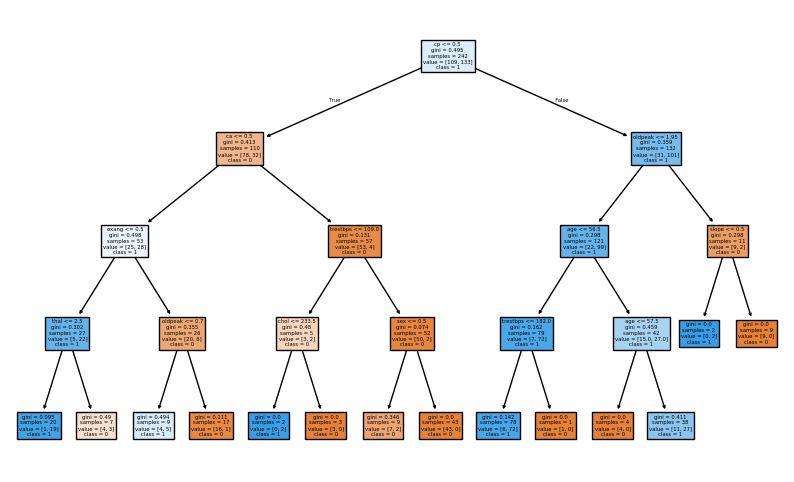

In [14]:
plt.figure(figsize=(10, 6))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=['0', '1'])
plt.show()

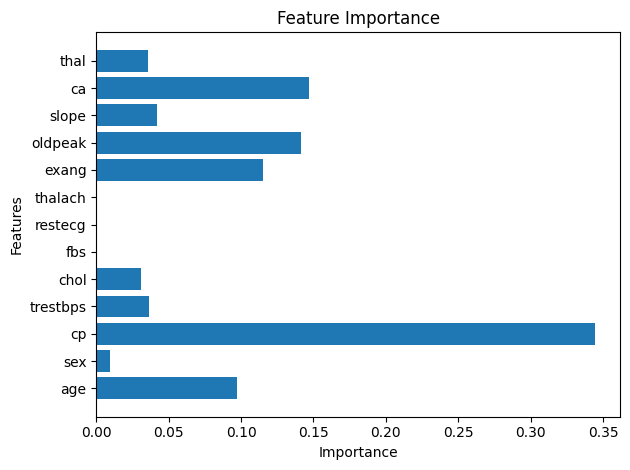

In [15]:
importance=dt.feature_importances_
features = x.columns
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [19]:
print("\n Please Enter Patient Medical Details (with Valid Ranges)\n")
age = int(input("Age (years) [18 – 100]: "))
sex = int(input(
"Sex:\n"
" 1 → Male\n"
" 0 → Female\n"
"Allowed: 0 or 1\n"
"Enter value: "
))
cp = int(input(
"Chest Pain Type (cp):\n"
" 0 → Typical Angina\n"
" 1 → Atypical Angina\n"
" 2 → Non-anginal Pain\n"
" 3 → Asymptomatic\n"
 "Allowed range: 0 – 3\n"
"Enter value: "
))
trestbps = int(input(
"Resting Blood Pressure (mm Hg)\n"
"Normal range: 90 – 200\n"
"Enter value: "
))
chol = int(input(
"Serum Cholesterol (mg/dl)\n"
"Typical range: 100 – 600\n"
"Enter value: "
))
fbs = int(input(
"Fasting Blood Sugar > 120 mg/dl (fbs):\n"
" 1 → Yes\n"
" 0 → No\n"
"Allowed: 0 or 1\n"
"Enter value: "
))
restecg = int(input(
"Resting ECG Result (restecg):\n"
" 0 → Normal\n"
" 1 → ST-T Wave Abnormality\n"
" 2 → Left Ventricular Hypertrophy\n"
"Allowed range: 0 – 2\n"
"Enter value: "
))
thalach = int(input(
"Maximum Heart Rate Achieved (thalach)\n"
"Typical range: 70 – 220\n"
"Enter value: "
))
exang = int(input(
"Exercise Induced Angina (exang):\n"
" 1 → Yes\n"
" 0 → No\n"
"Allowed: 0 or 1\n"
"Enter value: "
))
oldpeak = float(input(
    "Oldpeak (ST depression during exercise)\n"
    "Typical range: 0.0 – 6.0\n"
    "Enter value: "
))
slope = int(input(
"Slope of Peak Exercise ST Segment (slope):\n"
" 0 → Upsloping\n"
" 1 → Flat\n"
" 2 → Downsloping\n"
"Allowed range: 0 – 2\n"
"Enter value: "
))
ca = int(input(
"Number of Major Vessels Colored by Fluoroscopy (ca)\n"
"Allowed range: 0 – 4\n"
"Enter value: "
))
thal = int(input(
"Thalassemia (thal):\n"
" 0 → Normal\n"
" 1 → Fixed Defect\n"
" 2 → Reversible Defect\n"
"Allowed range: 0 – 2\n"
"Enter value: "
))
# Create DataFrame
user_data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs,
restecg, thalach, exang, oldpeak,
slope, ca, thal]],
columns=x.columns)
# Prediction
prediction = dt.predict(user_data)[0]
print("\n Prediction Result:")
if prediction == 1:
   print("Heart Disease Detected")
   print("Please Consult a Doctor")
else:
   print("No Heart Disease Detected")



 Please Enter Patient Medical Details (with Valid Ranges)

Age (years) [18 – 100]: 23
Sex:
 1 → Male
 0 → Female
Allowed: 0 or 1
Enter value: 1
Chest Pain Type (cp):
 0 → Typical Angina
 1 → Atypical Angina
 2 → Non-anginal Pain
 3 → Asymptomatic
Allowed range: 0 – 3
Enter value: 3
Resting Blood Pressure (mm Hg)
Normal range: 90 – 200
Enter value: 100
Serum Cholesterol (mg/dl)
Typical range: 100 – 600
Enter value: 350
Fasting Blood Sugar > 120 mg/dl (fbs):
 1 → Yes
 0 → No
Allowed: 0 or 1
Enter value: 1
Resting ECG Result (restecg):
 0 → Normal
 1 → ST-T Wave Abnormality
 2 → Left Ventricular Hypertrophy
Allowed range: 0 – 2
Enter value: 2
Maximum Heart Rate Achieved (thalach)
Typical range: 70 – 220
Enter value: 201
Exercise Induced Angina (exang):
 1 → Yes
 0 → No
Allowed: 0 or 1
Enter value: 1
Oldpeak (ST depression during exercise)
Typical range: 0.0 – 6.0
Enter value: 0.4
Slope of Peak Exercise ST Segment (slope):
 0 → Upsloping
 1 → Flat
 2 → Downsloping
Allowed range: 0 – 2
Ent